<a href="https://colab.research.google.com/github/KirkDCO/HandsOnML_Exercises/blob/main/CH14_Q09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# model similar to VGG16

# model = keras.models.Sequential([
#     keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same',
#                         input_shape = [28, 28, 1]),
#     keras.layers.MaxPooling2D(2),
#     keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
#     keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
#     keras.layers.MaxPooling2D(2),
#     keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
#     keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
#     keras.layers.MaxPooling2D(2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation = 'relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(64),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation = 'softmax')
# ])

# model similar to the one in the book 

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


Epoch 1/25
1594/1594 [==============================] - 32s 13ms/step - loss: 0.1999 - accuracy: 0.9397 - val_loss: 0.0522 - val_accuracy: 0.9849
Epoch 2/25
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0831 - accuracy: 0.9750 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 3/25
1594/1594 [==============================] - 22s 14ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 4/25
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 5/25
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 6/25
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0344 - val_accuracy: 0.9913
Epoch 7/25
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0394 -

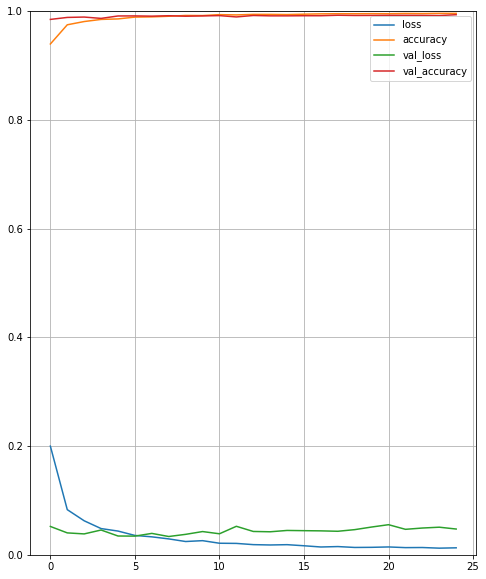

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0076 - accuracy: 0.9989
[0.007603634614497423, 0.9989333152770996]
313/313 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9936
[0.03682874143123627, 0.9936000108718872]


In [ ]:
# set up for a clean run
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# fit the model with callback option to test learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Nadam(),
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs =8,
                    validation_split = 0.15)

pd.DataFrame(history.history).plot(figsize = (8, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

In [ ]:
# add batchnorm
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


Epoch 1/25
1594/1594 [==============================] - 21s 12ms/step - loss: 0.2024 - accuracy: 0.9386 - val_loss: 0.0588 - val_accuracy: 0.9853
Epoch 2/25
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0933 - accuracy: 0.9730 - val_loss: 0.0596 - val_accuracy: 0.9823
Epoch 3/25
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 4/25
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.0612 - val_accuracy: 0.9849
Epoch 5/25
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0519 - val_accuracy: 0.9896
Epoch 6/25
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0601 - val_accuracy: 0.9887
Epoch 7/25
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0552 -

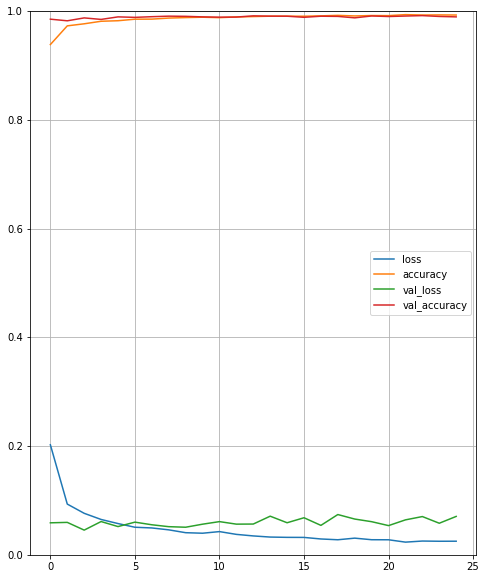

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9977
[0.012881319038569927, 0.9976833462715149]
313/313 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9908
[0.05468146875500679, 0.9908000230789185]


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# fit the model with callback option to test learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Nadam(),
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 25,
                    validation_split = 0.15)

pd.DataFrame(history.history).plot(figsize = (8, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 37s 22ms/step - loss: 0.0936 - accuracy: 0.9737 - val_loss: 0.0596 - val_accuracy: 0.9863
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0955 - accuracy: 0.9742 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 3/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0922 - accuracy: 0.9736 - val_loss: 0.0431 - val_accuracy: 0.9888
Epoch 4/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0893 - accuracy: 0.9755 - val_loss: 0.0382 - val_accuracy: 0.9901
Epoch 5/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0959 - accuracy: 0.9734 - val_loss: 0.0348 - val_accuracy: 0.9909
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0894 - accuracy: 0.9759 - val_loss: 0.0494 - val_accuracy: 0.9885
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0876 - accuracy: 0.9757 - val_loss: 0.0426 -

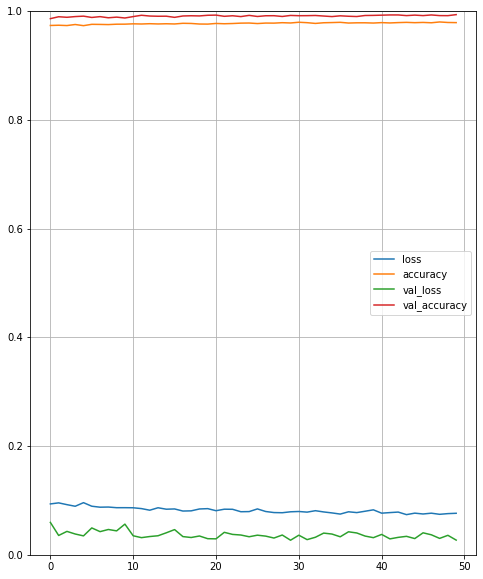

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0182 - accuracy: 0.9952
[0.018235769122838974, 0.9951666593551636]
313/313 [==============================] - 2s 5ms/step - loss: 0.0192 - accuracy: 0.9948
[0.01915111020207405, 0.9947999715805054]


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# fit the model with callback option to test learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Nadam(),
              metrics = ['accuracy'])

# create a generator for training and validation sets
X_valid_sub = X_train[:10000, ]
X_train_sub = X_train[10000:, ]

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 15, 
                             width_shift_range = .15,
                             height_shift_range = .15, 
                             fill_mode = 'nearest')
it_train = datagen.flow(X_train_sub, y_train_sub, batch_size = 32)

# fits the model on batches with real-time data augmentation:
history = model.fit(it_train,
                    validation_data = (X_valid_sub, y_valid_sub),
                    use_multiprocessing = True,
                    steps_per_epoch = len(it_train),
                    epochs = 50)

pd.DataFrame(history.history).plot(figsize = (8, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 63s 31ms/step - loss: 0.6072 - accuracy: 0.8240 - val_loss: 0.1357 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.1881 - accuracy: 0.9570 - val_loss: 0.0921 - val_accuracy: 0.9793 - lr: 7.9433e-04
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.1213 - accuracy: 0.9714 - val_loss: 0.0742 - val_accuracy: 0.9843 - lr: 6.3096e-04
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.0932 - accuracy: 0.9791 - val_loss: 0.0684 - val_accuracy: 0.9842 - lr: 5.0119e-04
Epoch 5/50
1563/1563 [==============================] - 51s 33ms/step - loss: 0.0762 - accuracy: 0.9827 - val_loss: 0.0391 - val_accuracy: 0.9904 - lr: 3.9811e-04
Epoch 6/50
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0642 - accuracy: 0.9857 - val_loss: 0.0363 - val_accuracy: 0.9924 - lr: 3.1623e-04
Epoch 7/50
1563/1563 [====

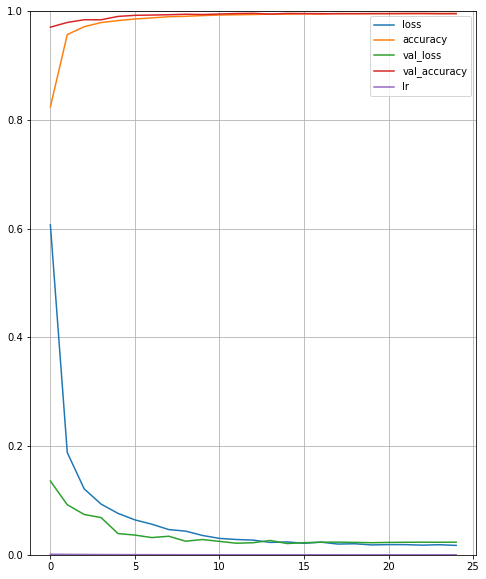

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0103 - accuracy: 0.9976
[0.010331553407013416, 0.9976000189781189]
313/313 [==============================] - 3s 9ms/step - loss: 0.0162 - accuracy: 0.9957
[0.016238398849964142, 0.9957000017166138]


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same',
                        input_shape = [28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# fit the model with callback option to test learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Nadam(),
              metrics = ['accuracy'])

# create a generator for training and validation sets
X_train_sub = X_train[10000:, ]
y_train_sub = y_train[10000:, ]
X_valid_sub = X_train[:10000, ]
y_valid_sub = y_train[:10000, ]

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 15, 
                             width_shift_range = .15,
                             height_shift_range = .15, 
                             fill_mode = 'nearest')
it_train = datagen.flow(X_train_sub, y_train_sub, batch_size = 32)

# add learning rate scheduling 
def exponential_decay_fn(epoch):
  return 0.001 * 0.1 ** (epoch / 10)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# add early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

# fits the model on batches with real-time data augmentation:
history = model.fit(it_train,
                    validation_data = (X_valid_sub, y_valid_sub),
                    use_multiprocessing = True,
                    steps_per_epoch = len(it_train),
                    epochs = 50,
                    callbacks = [early_stopping_cb, lr_scheduler])

pd.DataFrame(history.history).plot(figsize = (8, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))


In [2]:
# Kaggle version
# Previous code was used locally for testing and learning
# This version used the Kaggle dataset and was used to 
# create a Kaggle submission - 99.6% accurate,
# ranked in top 7.5% at the time.
# From here on, code should be able to stnad alone.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
train = pd.read_csv('drive/MyDrive/Colab Notebooks/HandsOnML/DigitRecog/train.csv')
y_train = train['label']
X_train = train.drop('label', axis=1)

X_test = pd.read_csv('drive/MyDrive/Colab Notebooks/HandsOnML/DigitRecog/test.csv')

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.array(X_train).reshape(42000, 28, 28, 1)
X_test = np.array(X_test).reshape(28000, 28, 28, 1)

print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)


X_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples


Epoch 1/50
1079/1079 [==============================] - 28s 15ms/step - loss: 0.8044 - accuracy: 0.7523 - val_loss: 0.1173 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 2/50
1079/1079 [==============================] - 16s 15ms/step - loss: 0.2263 - accuracy: 0.9424 - val_loss: 0.1043 - val_accuracy: 0.9744 - lr: 7.9433e-04
Epoch 3/50
1079/1079 [==============================] - 16s 15ms/step - loss: 0.1524 - accuracy: 0.9636 - val_loss: 0.0717 - val_accuracy: 0.9844 - lr: 6.3096e-04
Epoch 4/50
1079/1079 [==============================] - 15s 14ms/step - loss: 0.1129 - accuracy: 0.9740 - val_loss: 0.0550 - val_accuracy: 0.9843 - lr: 5.0119e-04
Epoch 5/50
1079/1079 [==============================] - 16s 15ms/step - loss: 0.0913 - accuracy: 0.9782 - val_loss: 0.0454 - val_accuracy: 0.9880 - lr: 3.9811e-04
Epoch 6/50
1079/1079 [==============================] - 15s 14ms/step - loss: 0.0761 - accuracy: 0.9813 - val_loss: 0.0340 - val_accuracy: 0.9901 - lr: 3.1623e-04
Epoch 7/50
1079/1079 [====

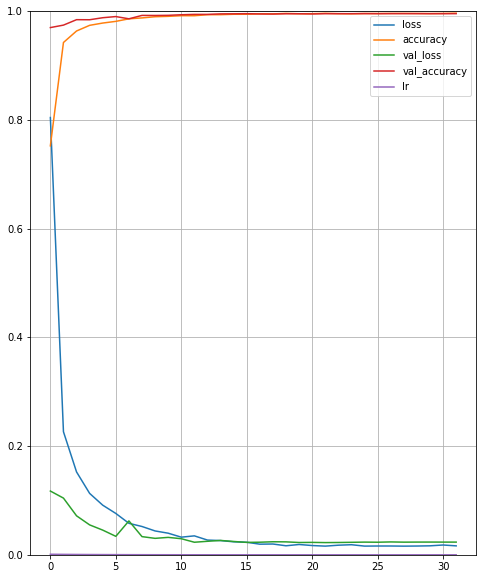

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same',
                        input_shape = [28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation = 'softmax')
])

keras.backend.clear_session()
tf.random.set_seed(720)
np.random.seed(720)

# fit the model with callback option to test learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Nadam(),
              metrics = ['accuracy'])

# create a generator for training and validation sets
X_train_sub = X_train[7500:, ]
y_train_sub = y_train[7500:, ]
X_valid_sub = X_train[:7500, ]
y_valid_sub = y_train[:7500, ]

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 15, 
                             width_shift_range = .15,
                             height_shift_range = .15, 
                             fill_mode = 'nearest')
it_train = datagen.flow(X_train_sub, y_train_sub, batch_size = 32)

# add learning rate scheduling 
def exponential_decay_fn(epoch):
  return 0.001 * 0.1 ** (epoch / 10)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# add early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

# fits the model on batches with real-time data augmentation:
history = model.fit(it_train,
                    validation_data = (X_valid_sub, y_valid_sub),
                    use_multiprocessing = True,
                    steps_per_epoch = len(it_train),
                    epochs = 50,
                    callbacks = [early_stopping_cb, lr_scheduler])

pd.DataFrame(history.history).plot(figsize = (8, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


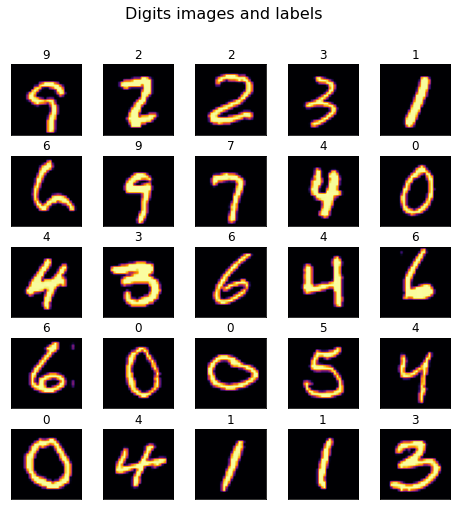

In [5]:
test_result = model.predict(X_test)

test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))

fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_test.shape[0])
    ax[i].imshow(np.array(X_test[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)
fig.show()

predicted_data = pd.DataFrame({
    'ImageId': range(1, X_test.shape[0] + 1),
    'Label': test_result
})

predicted_data.to_csv('drive/MyDrive/Colab Notebooks/HandsOnML/DigitRecog/pred.csv', index=False)